# Notebook 2: Build Data Warehouse and OLAP Analysis

This notebook covers:
1. Building dimension tables
2. Building fact table
3. Running OLAP-style queries on DataFrames
4. Generating analytical visualizations

## Setup and Imports

In [1]:
import sys
from pathlib import Path

# Add project root to Python path
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import project modules
from src.data.dwh_etl import run_etl_pipeline
from src.config import (
    CLEAN_CHURN_FILE,
    DIM_CUSTOMER_FILE,
    DIM_GEO_FILE,
    DIM_TIME_FILE,
    DIM_SEGMENT_FILE,
    FACT_CUSTOMER_STATUS_FILE
)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ All imports successful!")

✓ All imports successful!


## Step 1: Build Data Warehouse (ETL Pipeline)

In [2]:
# Run the complete ETL pipeline
dim_customer, dim_geo, dim_time, dim_segment, fact = run_etl_pipeline()


DATA WAREHOUSE ETL PIPELINE

Loading cleaned data from: /home/toanhac/playground/datawarehouse/bank_churn_dwh_dss/data/interim/churn_clean.csv
✓ Loaded 10000 records

Building dimension tables...
✓ Built dim_geo: 3 rows
✓ Built dim_time: 1 rows (snapshot date)
✓ Built dim_segment: 15 rows
✓ Built dim_customer: 10000 rows

Building fact table...
✓ Built fact_customer_status: 10000 rows

Saving tables to CSV...
  → Saved: dim_customer.csv
  → Saved: dim_geo.csv
  → Saved: dim_time.csv
  → Saved: dim_segment.csv
  → Saved: fact_customer_status.csv

✓ All tables saved to: /home/toanhac/playground/datawarehouse/bank_churn_dwh_dss/data/processed

ETL PIPELINE COMPLETE



## Step 2: Inspect Dimension Tables

In [3]:
# Geography Dimension
print("=" * 60)
print("DIM_GEO - Geography Dimension")
print("=" * 60)
print(dim_geo)
print(f"\nTotal countries: {len(dim_geo)}")

DIM_GEO - Geography Dimension
   geo_key  country
0        1   France
1        2  Germany
2        3    Spain

Total countries: 3


In [4]:
# Time Dimension
print("=" * 60)
print("DIM_TIME - Time Dimension")
print("=" * 60)
print(dim_time)
print(f"\nSnapshot: {dim_time.iloc[0]['year']}-Q{dim_time.iloc[0]['quarter']}")

DIM_TIME - Time Dimension
   time_key  year  month  quarter
0         1  2019     12        4

Snapshot: 2019-Q4


In [5]:
# Segment Dimension
print("=" * 60)
print("DIM_SEGMENT - Customer Segment Dimension")
print("=" * 60)
print(dim_segment)
print(f"\nTotal segments: {len(dim_segment)}")

DIM_SEGMENT - Customer Segment Dimension
    segment_key age_group income_group
0             1     26-35         High
1             2     26-35          Low
2             3     26-35          Mid
3             4     36-45         High
4             5     36-45          Low
5             6     36-45          Mid
6             7     46-55         High
7             8     46-55          Low
8             9     46-55          Mid
9            10      <=25         High
10           11      <=25          Low
11           12      <=25          Mid
12           13      >=56         High
13           14      >=56          Low
14           15      >=56          Mid

Total segments: 15


In [6]:
# Customer Dimension (first 10 rows)
print("=" * 60)
print("DIM_CUSTOMER - Customer Dimension (Sample)")
print("=" * 60)
print(dim_customer.head(10))
print(f"\nTotal customers: {len(dim_customer)}")

DIM_CUSTOMER - Customer Dimension (Sample)
   customer_key  customer_id  gender  age  tenure
0             1            1  Female   42       2
1             2            2  Female   41       1
2             3            3  Female   42       8
3             4            4  Female   39       1
4             5            5  Female   43       2
5             6            6    Male   44       8
6             7            7    Male   50       7
7             8            8  Female   29       4
8             9            9    Male   44       4
9            10           10    Male   27       2

Total customers: 10000


## Step 3: Inspect Fact Table

In [7]:
# Fact table overview
print("=" * 60)
print("FACT_CUSTOMER_STATUS - Fact Table")
print("=" * 60)
print(fact.head(10))
print(f"\nTotal records: {len(fact)}")
print(f"\nFact table columns: {list(fact.columns)}")

FACT_CUSTOMER_STATUS - Fact Table
   customer_key  time_key  geo_key  segment_key    balance  estimated_salary  \
0             1         1        1            6       0.00         101348.88   
1             2         1        3            6   83807.86         112542.58   
2             3         1        1            6  159660.80         113931.57   
3             4         1        1            6       0.00          93826.63   
4             5         1        3            6  125510.82          79084.10   
5             6         1        3            4  113755.78         149756.71   
6             7         1        1            8       0.00          10062.80   
7             8         1        2            3  115046.74         119346.88   
8             9         1        1            6  142051.07          74940.50   
9            10         1        1            3  134603.88          71725.73   

   num_of_products  credit_score  has_credit_card  is_active_member  \
0             

In [8]:
# Fact table statistics
print("Fact Table Statistics:")
print(fact.describe())

Fact Table Statistics:
       customer_key  time_key       geo_key   segment_key        balance  \
count   10000.00000   10000.0  10000.000000  10000.000000   10000.000000   
mean     5000.50000       1.0      1.746300      5.417400   76485.889288   
std      2886.89568       0.0      0.827529      3.693175   62397.405202   
min         1.00000       1.0      1.000000      1.000000       0.000000   
25%      2500.75000       1.0      1.000000      3.000000       0.000000   
50%      5000.50000       1.0      1.000000      5.000000   97198.540000   
75%      7500.25000       1.0      2.000000      7.000000  127644.240000   
max     10000.00000       1.0      3.000000     15.000000  250898.090000   

       estimated_salary  num_of_products  credit_score  has_credit_card  \
count      10000.000000     10000.000000  10000.000000      10000.00000   
mean      100090.239881         1.530200    650.528800          0.70550   
std        57510.492818         0.581654     96.653299          0.4

## Step 4: OLAP-Style Queries (Using Pandas)

These queries mimic the SQL queries in `sql/olap_queries.sql` but run on DataFrames.

In [9]:
# Query 1: Overall Churn Rate
print("=" * 60)
print("Query 1: Overall Churn Rate")
print("=" * 60)

total_customers = len(fact)
churned_customers = fact['churn_flag'].sum()
churn_rate = fact['churn_flag'].mean() * 100

print(f"Total Customers: {total_customers}")
print(f"Churned Customers: {churned_customers}")
print(f"Churn Rate: {churn_rate:.2f}%")

Query 1: Overall Churn Rate
Total Customers: 10000
Churned Customers: 2037
Churn Rate: 20.37%


In [10]:
# Query 2: Churn Rate by Country
print("=" * 60)
print("Query 2: Churn Rate by Country")
print("=" * 60)

# Join fact with dim_geo
fact_geo = fact.merge(dim_geo, on='geo_key')

churn_by_country = fact_geo.groupby('country').agg({
    'churn_flag': ['count', 'sum', 'mean']
}).round(4)

churn_by_country.columns = ['total_customers', 'churned_customers', 'churn_rate']
churn_by_country['churn_rate_pct'] = churn_by_country['churn_rate'] * 100
churn_by_country = churn_by_country.sort_values('churn_rate_pct', ascending=False)

print(churn_by_country)

Query 2: Churn Rate by Country
         total_customers  churned_customers  churn_rate  churn_rate_pct
country                                                                
Germany             2509                814      0.3244           32.44
Spain               2477                413      0.1667           16.67
France              5014                810      0.1615           16.15


In [11]:
# Query 3: Churn Rate by Age Group
print("=" * 60)
print("Query 3: Churn Rate by Age Group")
print("=" * 60)

# Join fact with dim_segment
fact_segment = fact.merge(dim_segment, on='segment_key')

churn_by_age = fact_segment.groupby('age_group').agg({
    'churn_flag': ['count', 'sum', 'mean']
}).round(4)

churn_by_age.columns = ['total_customers', 'churned_customers', 'churn_rate']
churn_by_age['churn_rate_pct'] = churn_by_age['churn_rate'] * 100

# Sort by age group order
age_order = ['<=25', '26-35', '36-45', '46-55', '>=56']
churn_by_age = churn_by_age.reindex(age_order)

print(churn_by_age)

Query 3: Churn Rate by Age Group
           total_customers  churned_customers  churn_rate  churn_rate_pct
age_group                                                                
<=25                   611                 46      0.0753            7.53
26-35                 3542                301      0.0850            8.50
36-45                 3736                733      0.1962           19.62
46-55                 1311                663      0.5057           50.57
>=56                   800                294      0.3675           36.75


In [12]:
# Query 4: Average Balance by Churn Status
print("=" * 60)
print("Query 4: Average Metrics by Churn Status")
print("=" * 60)

metrics_by_churn = fact.groupby('churn_flag').agg({
    'balance': 'mean',
    'estimated_salary': 'mean',
    'credit_score': 'mean',
    'num_of_products': 'mean',
    'has_credit_card': 'mean',
    'is_active_member': 'mean'
}).round(2)

metrics_by_churn.index = ['Retained', 'Churned']
print(metrics_by_churn)

Query 4: Average Metrics by Churn Status
           balance  estimated_salary  credit_score  num_of_products  \
Retained  72745.30          99738.39        651.85             1.54   
Churned   91108.54         101465.68        645.35             1.48   

          has_credit_card  is_active_member  
Retained             0.71              0.55  
Churned              0.70              0.36  


In [13]:
# Query 5: Churn Rate by Number of Products
print("=" * 60)
print("Query 5: Churn Rate by Number of Products")
print("=" * 60)

churn_by_products = fact.groupby('num_of_products').agg({
    'churn_flag': ['count', 'sum', 'mean']
}).round(4)

churn_by_products.columns = ['total_customers', 'churned_customers', 'churn_rate']
churn_by_products['churn_rate_pct'] = churn_by_products['churn_rate'] * 100

print(churn_by_products)

Query 5: Churn Rate by Number of Products
                 total_customers  churned_customers  churn_rate  \
num_of_products                                                   
1                           5084               1409      0.2771   
2                           4590                348      0.0758   
3                            266                220      0.8271   
4                             60                 60      1.0000   

                 churn_rate_pct  
num_of_products                  
1                         27.71  
2                          7.58  
3                         82.71  
4                        100.00  


In [14]:
# Query 6: Top Segments with Highest Churn
print("=" * 60)
print("Query 6: Top 10 Segments with Highest Churn Rate")
print("=" * 60)

# Join fact with all dimensions
fact_full = fact.merge(dim_segment, on='segment_key') \
                .merge(dim_geo, on='geo_key')

top_churn_segments = fact_full.groupby(['age_group', 'income_group', 'country']).agg({
    'churn_flag': ['count', 'sum', 'mean']
}).round(4)

top_churn_segments.columns = ['total_customers', 'churned_customers', 'churn_rate']
top_churn_segments['churn_rate_pct'] = top_churn_segments['churn_rate'] * 100

# Filter segments with at least 10 customers
top_churn_segments = top_churn_segments[top_churn_segments['total_customers'] >= 10]
top_churn_segments = top_churn_segments.sort_values('churn_rate_pct', ascending=False).head(10)

print(top_churn_segments)

Query 6: Top 10 Segments with Highest Churn Rate
                                total_customers  churned_customers  \
age_group income_group country                                       
46-55     High         Germany              148                102   
          Low          Germany              128                 87   
          Mid          Germany              127                 81   
>=56      High         Germany               64                 36   
          Low          Germany               77                 42   
46-55     High         Spain                109                 56   
>=56      Mid          Germany               71                 34   
46-55     Mid          France               212                 96   
          High         France               199                 89   
          Mid          Spain                 95                 41   

                                churn_rate  churn_rate_pct  
age_group income_group country                   

## Step 5: Visualize OLAP Results

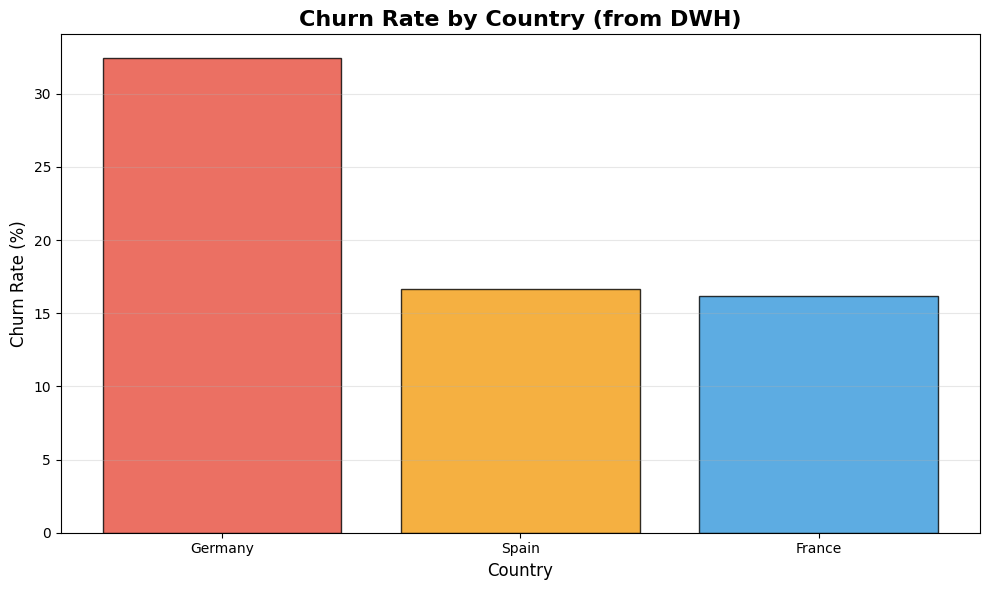

In [15]:
# Visualize churn rate by country
plt.figure(figsize=(10, 6))
plt.bar(churn_by_country.index, churn_by_country['churn_rate_pct'], 
        color=['#e74c3c', '#f39c12', '#3498db'], alpha=0.8, edgecolor='black')
plt.title('Churn Rate by Country (from DWH)', fontsize=16, fontweight='bold')
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

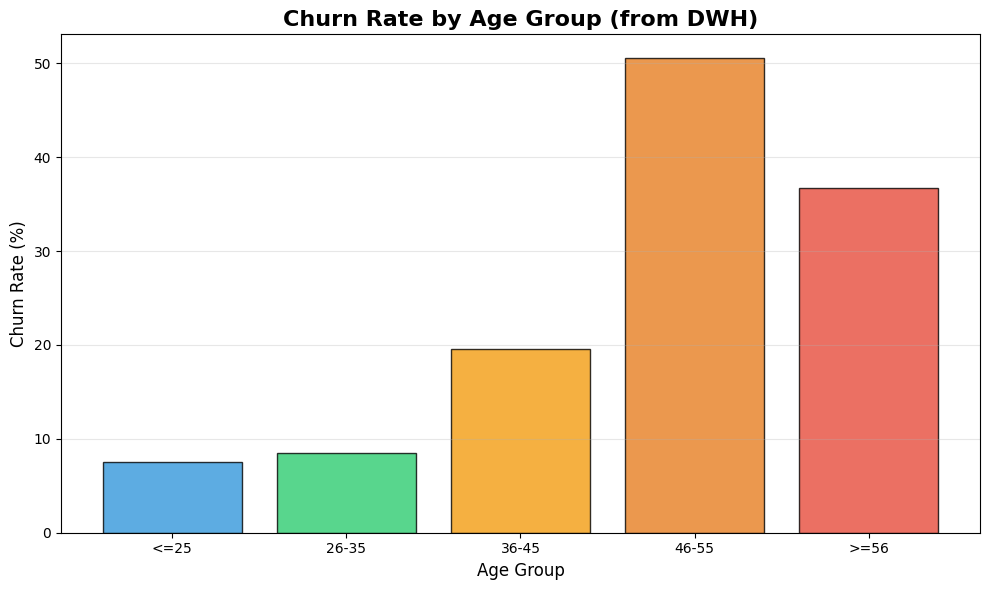

In [16]:
# Visualize churn rate by age group
plt.figure(figsize=(10, 6))
plt.bar(churn_by_age.index, churn_by_age['churn_rate_pct'],
        color=['#3498db', '#2ecc71', '#f39c12', '#e67e22', '#e74c3c'],
        alpha=0.8, edgecolor='black')
plt.title('Churn Rate by Age Group (from DWH)', fontsize=16, fontweight='bold')
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xlabel('Age Group', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()